データ保管用フォルダの作成

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!mkdir quickdraw

データのダウンロード

In [ ]:
!gsutil -m cp 'gs://quickdraw_dataset/full/numpy_bitmap/cat.npy' ./quickdraw

Copying gs://quickdraw_dataset/full/numpy_bitmap/cat.npy...
/ [1/1 files][ 92.1 MiB/ 92.1 MiB] 100% Done                                    
Operation completed over 1 objects/92.1 MiB.                                     


In [ ]:
!gsutil -m cp 'gs://quickdraw_dataset/full/numpy_bitmap/shark.npy' ./quickdraw

Copying gs://quickdraw_dataset/full/numpy_bitmap/shark.npy...
/ [1/1 files][ 94.2 MiB/ 94.2 MiB] 100% Done                                    
Operation completed over 1 objects/94.2 MiB.                                     


In [ ]:
!gsutil -m cp 'gs://quickdraw_dataset/full/numpy_bitmap/penguin.npy' ./quickdraw

Copying gs://quickdraw_dataset/full/numpy_bitmap/penguin.npy...
- [1/1 files][189.8 MiB/189.8 MiB] 100% Done                                    
Operation completed over 1 objects/189.8 MiB.                                    


In [ ]:
!gsutil -m cp 'gs://quickdraw_dataset/full/numpy_bitmap/octopus.npy' ./quickdraw

Copying gs://quickdraw_dataset/full/numpy_bitmap/octopus.npy...
- [1/1 files][112.3 MiB/112.3 MiB] 100% Done                                    
Operation completed over 1 objects/112.3 MiB.                                    


In [ ]:
import os
import glob
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from keras import models
from keras import legacy_tf_layers
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,Dropout
from keras.utils.np_utils import to_categorical
from keras.engine.sequential import Sequential
from keras.datasets import mnist

from sklearn.model_selection import train_test_split

データの読み込み

In [ ]:
quick_draw_cat = np.zeros((0, 784))

In [ ]:
quick_draw_shark = np.zeros((0, 784))

In [ ]:
quick_draw_penguin = np.zeros((0, 784))

In [ ]:
quick_draw_octopus = np.zeros((0, 784))

In [ ]:
path_1 = glob.glob('/content/quickdraw/cat.npy')

In [ ]:
path_2 = glob.glob('/content/quickdraw/shark.npy')

In [ ]:
path_3 = glob.glob('/content/quickdraw/penguin.npy')

In [ ]:
path_4 = glob.glob('/content/quickdraw/octopus.npy')

In [ ]:
path_1

['/content/quickdraw/cat.npy']

In [ ]:
path_2

['/content/quickdraw/shark.npy']

70000枚ずつ読み込み

In [ ]:
for i_1 in path_1:
  d_1 = np.load(i_1)
  quick_draw_cat = np.concatenate([quick_draw_cat, d_1[:70000]])

In [ ]:
for i_2 in path_2:
  d_2 = np.load(i_2)
  quick_draw_shark = np.concatenate([quick_draw_shark, d_2[:70000]])

In [ ]:
for i_3 in path_3:
  d_3 = np.load(i_3)
  quick_draw_penguin = np.concatenate([quick_draw_penguin, d_3[:70000]])

In [ ]:
for i_4 in path_4:
  d_4 = np.load(i_4)
  quick_draw_octopus = np.concatenate([quick_draw_octopus, d_4[:70000]])

In [ ]:
quick_draw_cat.shape

(70000, 784)

In [ ]:
quick_draw_shark.shape

(70000, 784)

In [ ]:
quick_draw_penguin.shape

(70000, 784)

In [ ]:
quick_draw_octopus.shape

(70000, 784)

$28 \times 28$の$1$チャンネル画像形式に変換

In [ ]:
quick_draw = np.concatenate([quick_draw_cat,quick_draw_shark,quick_draw_penguin,quick_draw_octopus])

In [ ]:
#quick_draw = quick_draw_penguin + quick_draw_octopus

In [ ]:
quick_draw.shape

(280000, 784)

In [ ]:
quick_draw = quick_draw.reshape(quick_draw.shape[0], 28, 28)

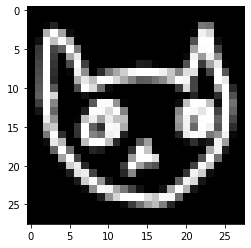

In [ ]:
plt.imshow(quick_draw[199], cmap='gray')

正解ラベル作成

In [ ]:
#with open('penguinegory_penguin.txt', 'r') as f:
#  t = f.read().split('\n')

In [ ]:
#t = to_penguinegorical(t)

In [ ]:
t = ['penguin','octopus']

In [ ]:
t = [0] * 70000 + [1] * 70000 + [2] * 70000 + [3] * 70000

In [ ]:
#t_penguin = [1] * 1000

In [ ]:
t = to_categorical(t,4)

In [ ]:
t

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
print(t.shape)

(280000, 4)


In [ ]:
x_train,x_test,t_train,t_test = train_test_split(quick_draw,t,train_size = 0.8,random_state = 0)

In [ ]:
x_train.shape

(224000, 28, 28)

In [ ]:
t_train.shape

(224000, 4)

In [ ]:
x_test.shape

(56000, 28, 28)

In [ ]:
t_test.shape

(56000, 4)

In [ ]:
model = Sequential()

In [ ]:
# CNN特有の層
# 畳み込み層
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=1, activation='relu', padding='same', input_shape=(28, 28, 1)))
# プーリング層
model.add(MaxPooling2D(2,2))

# 畳み込み層
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
# プーリング層
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=1, activation='relu', padding='same'))
# 3次元→1次元へ変換
model.add(Flatten())
# 全結合層
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=4, activation='softmax'))

In [ ]:
rho = 0.01
epochs = 20
#batch = 500
batch = 1200

In [ ]:
import tensorflow as tf
from keras import optimizers
adagrad = tf.keras.optimizers.Adagrad(learning_rate = rho)
adam = tf.keras.optimizers.Adam()

In [ ]:
model.compile(optimizer = adagrad,
               loss = "categorical_crossentropy",
               metrics = ["accuracy"])

In [ ]:
result = model.fit(x_train,t_train,batch_size = batch, epochs = epochs, validation_data = (x_test,t_test))

Epoch 1/20
187/187 [==============================] - 18s 51ms/step - loss: 1.2427 - accuracy: 0.8273 - val_loss: 0.2575 - val_accuracy: 0.9120
Epoch 2/20
187/187 [==============================] - 9s 47ms/step - loss: 0.2031 - accuracy: 0.9308 - val_loss: 0.1775 - val_accuracy: 0.9400
Epoch 3/20
187/187 [==============================] - 9s 46ms/step - loss: 0.1695 - accuracy: 0.9429 - val_loss: 0.1644 - val_accuracy: 0.9447
Epoch 4/20
187/187 [==============================] - 9s 47ms/step - loss: 0.1504 - accuracy: 0.9496 - val_loss: 0.1453 - val_accuracy: 0.9524
Epoch 5/20
187/187 [==============================] - 9s 47ms/step - loss: 0.1376 - accuracy: 0.9542 - val_loss: 0.1416 - val_accuracy: 0.9525
Epoch 6/20
187/187 [==============================] - 9s 47ms/step - loss: 0.1290 - accuracy: 0.9570 - val_loss: 0.1333 - val_accuracy: 0.9557
Epoch 7/20
187/187 [==============================] - 9s 47ms/step - loss: 0.1223 - accuracy: 0.9592 - val_loss: 0.1277 - val_accuracy: 0.957

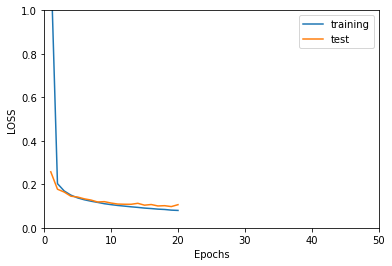

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1, epochs+1), result.history['loss'], label="training")
plt.plot(range(1, epochs+1), result.history['val_loss'], label="test")
plt.xlabel('Epochs')
plt.ylabel('LOSS')
plt.xlim([0,50])
plt.ylim([0,1])
plt.legend()
plt.show()

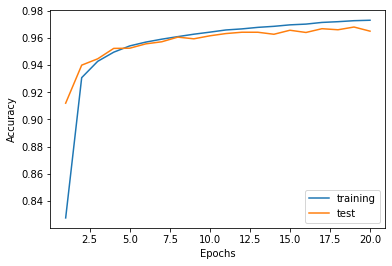

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, epochs+1), result.history['accuracy'], label="training")
plt.plot(range(1, epochs+1), result.history['val_accuracy'], label="test")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
model.predict(np.array([x_test[0]]))

1/1 [==============================] - 0s 138ms/step


array([[8.0927457e-05, 2.3652881e-05, 9.9988806e-01, 7.3940214e-06]],
      dtype=float32)

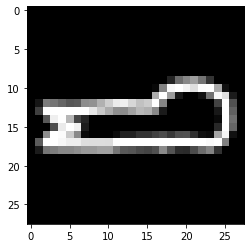

In [ ]:
plt.imshow(np.squeeze(x_test[457]), cmap='gray')

In [ ]:
t_test[10100]

array([0., 1., 0., 0.], dtype=float32)

モデルのセーブ

In [ ]:
model.save('draw_model_test_b.h5')